In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
application = pd.read_csv("application_record.csv")

In [5]:
credit = pd.read_csv("credit_record.csv")

In [6]:
application

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [7]:
application.shape

(438557, 18)

In [8]:
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [9]:
credit

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [10]:
credit.shape

(1048575, 3)

In [11]:
#Which is allowed, as credit data contains user data for several months
credit.nunique()

ID                45985
MONTHS_BALANCE       61
STATUS                8
dtype: int64

In [12]:
# Number of IDs whose credit record is also known
len(set(application["ID"]).intersection(set(credit["ID"])))

36457

In [13]:
#no missing values in credit
credit.isnull().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

# # Data Preprocessing

In [14]:
#checking for duplicate values
application["ID"].nunique()

438510

In [15]:
# we have total 438557 value and 438510 unique values
print("Number of duplicate values: ", 438557-438510)

Number of duplicate values:  47


Earlier I had handled Application null values in Data Preprocessing stage, but task 3 deals with the same question.
So i shifted the commands donnwards to task 3

In [19]:
#We will remove the duplicate rows and keep their last occurrence 
application = application.drop_duplicates("ID", keep = "last")

In [20]:
application.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438510 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438510 non-null  int64  
 1   CODE_GENDER          438510 non-null  object 
 2   FLAG_OWN_CAR         438510 non-null  object 
 3   FLAG_OWN_REALTY      438510 non-null  object 
 4   CNT_CHILDREN         438510 non-null  int64  
 5   AMT_INCOME_TOTAL     438510 non-null  float64
 6   NAME_INCOME_TYPE     438510 non-null  object 
 7   NAME_EDUCATION_TYPE  438510 non-null  object 
 8   NAME_FAMILY_STATUS   438510 non-null  object 
 9   NAME_HOUSING_TYPE    438510 non-null  object 
 10  DAYS_BIRTH           438510 non-null  int64  
 11  DAYS_EMPLOYED        438510 non-null  int64  
 12  FLAG_MOBIL           438510 non-null  int64  
 13  FLAG_WORK_PHONE      438510 non-null  int64  
 14  FLAG_PHONE           438510 non-null  int64  
 15  FLAG_EMAIL       

In [18]:
application[application["ID"].duplicated() == True].head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
421349,7602432,F,N,N,0,117000.0,Pensioner,Higher education,Married,House / apartment,-24708,365243,1,0,0,0,NaN,2.0
422660,7052783,M,Y,Y,2,166500.0,Working,Secondary / secondary special,Married,House / apartment,-15883,-2697,1,1,0,1,Managers,4.0
423702,7838075,F,Y,Y,0,315000.0,Commercial associate,Higher education,Single / not married,House / apartment,-10698,-1659,1,0,0,1,NaN,1.0
424480,7053557,M,Y,Y,1,193500.0,Working,Secondary / secondary special,Married,House / apartment,-10439,-2250,1,1,0,0,Core staff,3.0
425306,7023651,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229,-1209,1,0,0,0,Accountants,1.0


In [22]:
application.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438510 entries, 0 to 438556
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438510 non-null  int64  
 1   CODE_GENDER          438510 non-null  object 
 2   FLAG_OWN_CAR         438510 non-null  object 
 3   FLAG_OWN_REALTY      438510 non-null  object 
 4   CNT_CHILDREN         438510 non-null  int64  
 5   AMT_INCOME_TOTAL     438510 non-null  float64
 6   NAME_INCOME_TYPE     438510 non-null  object 
 7   NAME_EDUCATION_TYPE  438510 non-null  object 
 8   NAME_FAMILY_STATUS   438510 non-null  object 
 9   NAME_HOUSING_TYPE    438510 non-null  object 
 10  DAYS_BIRTH           438510 non-null  int64  
 11  DAYS_EMPLOYED        438510 non-null  int64  
 12  CNT_FAM_MEMBERS      438510 non-null  float64
dtypes: float64(2), int64(4), object(7)
memory usage: 46.8+ MB


# TASK 1 - Exploratory Data Analysis

 ### <-----------------------Question 1----------------------------->

What is the distribution of credit card approval status in the dataset? 
How many applications are approved and how many are not approved?

In [24]:
convert = {'C' : 'Good_Debt', 'X' : 'Good_Debt', '0' : 'Good_Debt', '1' : 'Neutral_Debt', '2' : 'Neutral_Debt', '3' : 'Bad_Debt', '4' : 'Bad_Debt', '5' : 'Bad_Debt'}
credit.replace({'STATUS' : convert}, inplace=True)

In [25]:
credit

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,Good_Debt
1,5001711,-1,Good_Debt
2,5001711,-2,Good_Debt
3,5001711,-3,Good_Debt
4,5001712,0,Good_Debt
...,...,...,...
1048570,5150487,-25,Good_Debt
1048571,5150487,-26,Good_Debt
1048572,5150487,-27,Good_Debt
1048573,5150487,-28,Good_Debt


In [26]:
credit = credit.value_counts(subset=['ID', 'STATUS']).unstack(fill_value=0)

In [28]:
credit.loc[(credit["Good_Debt"] > credit["Neutral_Debt"]),'CREDIT_APPROVAL_STATUS'] = 1
credit.loc[(credit['Good_Debt'] > credit['Bad_Debt']),'CREDIT_APPROVAL_STATUS'] = 1
credit.loc[(credit['Neutral_Debt'] > credit['Good_Debt']),'CREDIT_APPROVAL_STATUS'] = 0
credit.loc[(credit['Neutral_Debt'] > credit['Bad_Debt']),'CREDIT_APPROVAL_STATUS'] = 1
credit.loc[(credit['Bad_Debt'] > credit['Good_Debt']),'CREDIT_APPROVAL_STATUS'] = 0
credit.loc[(credit['Bad_Debt'] > credit['Neutral_Debt']),'CREDIT_APPROVAL_STATUS'] = 0

In [30]:
credit

STATUS,Bad_Debt,Good_Debt,Neutral_Debt,CREDIT_APPROVAL_STATUS
ID,,,,
5001711,0,4,0,1.0
5001712,0,19,0,1.0
5001713,0,22,0,1.0
5001714,0,15,0,1.0
5001715,0,60,0,1.0
...,...,...,...,...
5150482,0,18,0,1.0
5150483,0,18,0,1.0
5150484,0,13,0,1.0


In [33]:
disapproved_c = credit[credit['CREDIT_APPROVAL_STATUS']==0.0].count()
disapproved_c

STATUS
Bad_Debt                  189
Good_Debt                 189
Neutral_Debt              189
CREDIT_APPROVAL_STATUS    189
dtype: int64

In [34]:
approved_c = credit[credit['CREDIT_APPROVAL_STATUS']==1.0].count()
approved_c

STATUS
Bad_Debt                  45796
Good_Debt                 45796
Neutral_Debt              45796
CREDIT_APPROVAL_STATUS    45796
dtype: int64

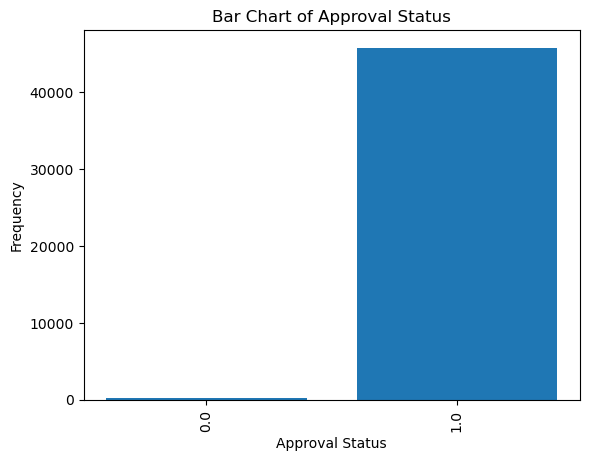

In [38]:
col = credit['CREDIT_APPROVAL_STATUS']

value_c = col.value_counts()

value_counts_sorted = value_c.sort_index()

plt.bar(value_counts_sorted.index, value_counts_sorted.values)
plt.xticks(range(len(value_counts_sorted)), value_counts_sorted.index, rotation=90)
plt.xlabel('Approval Status')
plt.ylabel('Frequency')
plt.title('Bar Chart of Approval Status')

plt.show()


189 are not apprved and 45796 are approved.

### <-----------------------Question 2----------------------------->

In [39]:
credit_merged = application.merge(credit, how='inner', on=['ID'])

In [43]:
credit_merged[(credit_merged["CODE_GENDER"] == "M") & (credit_merged['CREDIT_APPROVAL_STATUS'] == 1.0)]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,Bad_Debt,Good_Debt,Neutral_Debt,CREDIT_APPROVAL_STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,2.0,0,15,1,1.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,2.0,0,14,1,1.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,2.0,0,30,0,1.0
10,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,2.0,0,6,0,1.0
11,5112956,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,2.0,0,43,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36439,5148602,M,N,Y,0,225000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22946,365243,2.0,1,14,1,1.0
36447,5149145,M,Y,Y,0,247500.0,Working,Secondary / secondary special,Married,House / apartment,-10952,-3577,2.0,0,22,4,1.0
36448,5149158,M,Y,Y,0,247500.0,Working,Secondary / secondary special,Married,House / apartment,-10952,-3577,2.0,0,27,2,1.0
36450,5149729,M,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-19101,-1721,2.0,0,21,1,1.0


In [42]:
credit_merged[(credit_merged["CODE_GENDER"] == "F") & (credit_merged['CREDIT_APPROVAL_STATUS'] == 1.0)]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,Bad_Debt,Good_Debt,Neutral_Debt,CREDIT_APPROVAL_STATUS
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1.0,0,5,0,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1.0,0,5,0,1.0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1.0,0,27,0,1.0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1.0,0,39,0,1.0
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1.0,0,17,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36445,5149055,F,N,Y,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15837,-2694,2.0,0,14,6,1.0
36446,5149056,F,N,Y,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15837,-2694,2.0,0,37,6,1.0
36451,5149775,F,Y,Y,0,130500.0,Working,Secondary / secondary special,Married,House / apartment,-16137,-9391,2.0,0,16,4,1.0
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,2.0,9,15,9,1.0


In [51]:
#Approval rate for males
print("Approval rate for males")
m_approve = credit_merged[(credit_merged["CODE_GENDER"] == "M") & (credit_merged['CREDIT_APPROVAL_STATUS'] == 1.0)]["ID"].count() 
m_total = credit_merged[(credit_merged['CREDIT_APPROVAL_STATUS'] == 1.0)]["ID"].count() 
m_approve / m_total

Approval rate for males


0.32956643973429617

In [52]:
#Approval rate for females
print("Approval rate for females")
f_approve = credit_merged[(credit_merged["CODE_GENDER"] == "F") & (credit_merged['CREDIT_APPROVAL_STATUS'] == 1.0)]["ID"].count() 
f_total = credit_merged[(credit_merged['CREDIT_APPROVAL_STATUS'] == 1.0)]["ID"].count() 
f_approve / f_total

Approval rate for females


0.6704335602657038

In [54]:
import statsmodels.api as sm

contingency_table = pd.crosstab(credit_merged['CODE_GENDER'], credit_merged['CREDIT_APPROVAL_STATUS'])

# Extract the approval counts for each gender
male_approvals = contingency_table.loc['M', 1.0]
female_approvals = contingency_table.loc['F', 1.0]

# Extract the total counts for each gender
male_total = contingency_table.loc['M'].sum()
female_total = contingency_table.loc['F'].sum()

# Perform the z-test for comparing proportions
z_stat, p_value = sm.stats.proportions_ztest([male_approvals, female_approvals],
                                             [male_total, female_total])

# Print the results of the hypothesis test
print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_value:.4f}")



Z-statistic: -1.9186
P-value: 0.0550


The z-statistic : In this case, the negative value indicates that the approval rate for males is lower than the approval rate for females.

The p-value of 0.0550 suggests that there is a moderate level of evidence against the null hypothesis of no difference in approval rates between males and females

### <-----------------------Question 3----------------------------->

In [57]:
application["DAYS_EMPLOYED"].isnull().sum() 

0

In [58]:
application["NAME_EDUCATION_TYPE"].isnull().sum() 

0

In [16]:
application.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [17]:
print("Precentage of data in OCCUPATION_TYPE that is null")
application["OCCUPATION_TYPE"].isnull().sum() / 438557 * 100

Precentage of data in OCCUPATION_TYPE that is null


30.601039317580152

Now we will drop columns OCCUPATION_TYPE (due to large missing values) 
Also droppping FLAG_MOBIL, FLAG_WORK_PHONE, FLAG_PHONE, 
FLAG_EMAIL as they do not affect whether a credit card will be approved or not

In [21]:
application.drop(["OCCUPATION_TYPE", "FLAG_MOBIL", "FLAG_WORK_PHONE", "FLAG_PHONE" , "FLAG_EMAIL"], axis = 1, inplace = True)

In [59]:
application.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
CNT_FAM_MEMBERS        0
dtype: int64

Only OCCUPATION_TYPE contained missing values, due to large number of inconsistanies, I dropped the column in data
pre-processing
other columns did not have missing values. 
Irrevalnt columns such as "FLAG_MOBIL", "FLAG_WORK_PHONE", "FLAG_PHONE" , "FLAG_EMAIL" were also dropped

### <-----------------------Question 4----------------------------->

Can you visualize the distribution of "Total_income" for approved and not approved credit card applications using a suitable plot, such as a boxplot or histogram? Are there any noticeable differences in income between the two groups?

In [61]:
approved_data = credit_merged[(credit_merged['CREDIT_APPROVAL_STATUS'] == 1.0)]
not_approved_data = credit_merged[(credit_merged['CREDIT_APPROVAL_STATUS'] == 0.0)]

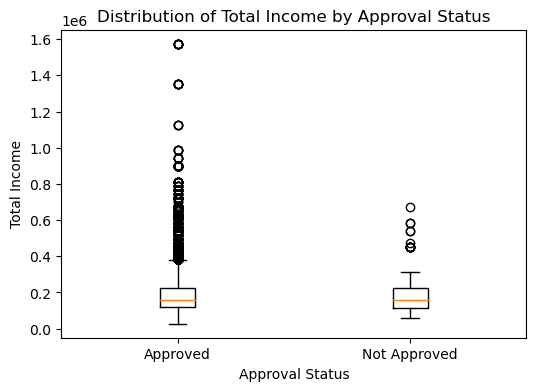

In [68]:
plt.figure(figsize=(6, 4))
plt.boxplot([approved_data['AMT_INCOME_TOTAL'], not_approved_data['AMT_INCOME_TOTAL']],
            labels=['Approved', 'Not Approved'])
plt.xlabel('Approval Status')
plt.ylabel('Total Income')
plt.title('Distribution of Total Income by Approval Status')
plt.show()


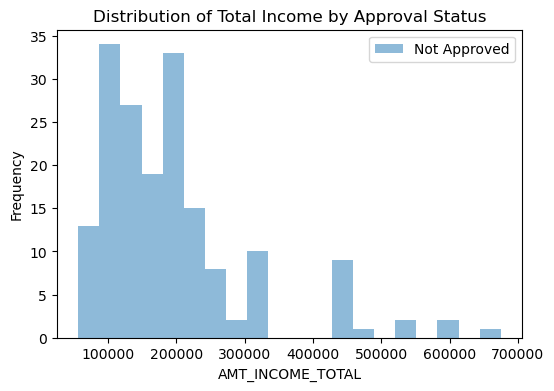

In [66]:
plt.figure(figsize=(6, 4))
plt.hist(not_approved_data['AMT_INCOME_TOTAL'], bins=20, alpha=0.5, label='Not Approved')
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('Frequency')
plt.title('Distribution of Total Income by Approval Status')
plt.legend()
plt.show()

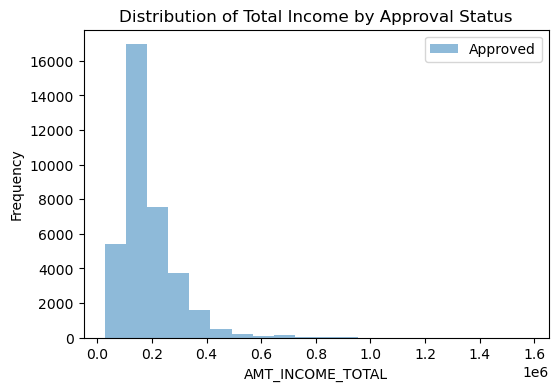

In [67]:
plt.figure(figsize=(6, 4))
plt.hist(approved_data['AMT_INCOME_TOTAL'], bins=20, alpha=0.5, label='Approved')
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('Frequency')
plt.title('Distribution of Total Income by Approval Status')
plt.legend()
plt.show()


Yes, there is huge difference between amy_income_total of approved and disapproved applications

### <-----------------------Question 5----------------------------->

What is the most common income type and education type among the applicants? Can you create a bar plot or pie chart to visualize the distribution of income types and education types?

In [69]:
credit_merged["NAME_INCOME_TYPE"].value_counts().idxmax()

'Working'

In [71]:
credit_merged["NAME_EDUCATION_TYPE"].value_counts().idxmax()

'Secondary / secondary special'

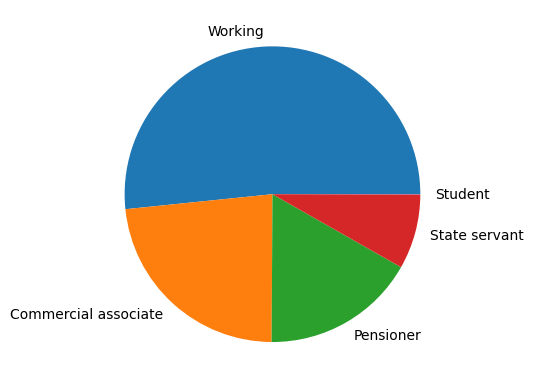

In [74]:
plt.pie(credit_merged["NAME_INCOME_TYPE"].value_counts(),labels=list(credit_merged["NAME_INCOME_TYPE"].unique()))
plt.show()

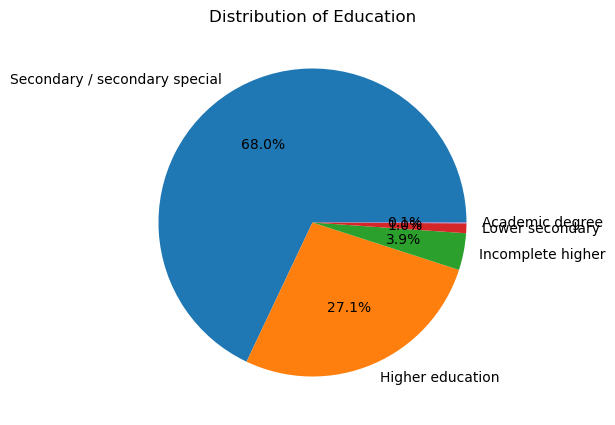

In [81]:
education_counts = credit_merged['NAME_EDUCATION_TYPE'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Education')
plt.show()

The most common income type is working 
The most common education type is Secondary/secondary special

# Task 2 - Classification/Regression

Perform following steps on the same dataset which you used for EDA.

Data Preprocessing (as per requirement)

Feature Engineering

Split dataset in train-test (80:20 ratio)

Model selection

Model training

Model evaluation

Fine-tune the Model

Make predictions

Summarize your model's performance by evaluation metrices

I have pre-processed my data before task - 2.
Listing all pre-processing done in "application.csv"
1. handling duplicate values (deleated all duplicate values except last occurance)
2. Removed OCCUPATION_TYPE column as due to large no of missing values
3. Removed the following columns as they did not play a vital role in model training FLAG_MOBIL, FLAG_WORK_PHONE, 
FLAG_PHONE, FLAG_EMAIL

no changes made in "credit.csv"

Continuing with data - preprocessing

In [ ]:
#PRE-PPROCESSING APPLICATIONS.CSV FIRST

In [85]:
#Parsing

objects_data = pd.DataFrame(application.dtypes =='object').reset_index()
object_type = objects_data[objects_data[0] == True]['index']
object_type

1            CODE_GENDER
2           FLAG_OWN_CAR
3        FLAG_OWN_REALTY
6       NAME_INCOME_TYPE
7    NAME_EDUCATION_TYPE
8     NAME_FAMILY_STATUS
9      NAME_HOUSING_TYPE
Name: index, dtype: object

In [87]:
#Distribution of datapoints in model

a = application[object_type]['CODE_GENDER'].value_counts()
b = application[object_type]['FLAG_OWN_CAR'].value_counts()
c = application[object_type]['FLAG_OWN_REALTY'].value_counts()
d = application[object_type]['NAME_INCOME_TYPE'].value_counts()
e = application[object_type]['NAME_EDUCATION_TYPE'].value_counts()
f = application[object_type]['NAME_FAMILY_STATUS'].value_counts()
g = application[object_type]['NAME_HOUSING_TYPE'].value_counts()

print('\n',a,'\n\n',b,'\n\n',c,'\n\n',d,'\n\n',e,'\n\n',f,'\n\n',g)


 F    294412
M    144098
Name: CODE_GENDER, dtype: int64 

 N    275428
Y    163082
Name: FLAG_OWN_CAR, dtype: int64 

 Y    304043
N    134467
Name: FLAG_OWN_REALTY, dtype: int64 

 Working                 226087
Commercial associate    100739
Pensioner                75483
State servant            36184
Student                     17
Name: NAME_INCOME_TYPE, dtype: int64 

 Secondary / secondary special    301789
Higher education                 117509
Incomplete higher                 14849
Lower secondary                    4051
Academic degree                     312
Name: NAME_EDUCATION_TYPE, dtype: int64 

 Married                 299798
Single / not married     55268
Civil marriage           36524
Separated                27249
Widow                    19671
Name: NAME_FAMILY_STATUS, dtype: int64 

 House / apartment      393788
With parents            19074
Municipal apartment     14213
Rented apartment         5974
Office apartment         3922
Co-op apartment          1539
N

In [92]:
# converting all non-numeric data to numeric data using LabelEncoder()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in application:
    if application[x].dtypes == 'object':
        application[x] = le.fit_transform(application[x])

In [93]:
application

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS
0,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,2.0
1,5008805,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,2.0
2,5008806,1,1,1,0,112500.0,4,4,1,1,-21474,-1134,2.0
3,5008808,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1.0
4,5008809,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,1,0,1,0,135000.0,1,4,2,1,-22717,365243,1.0
438553,6840222,0,0,0,0,103500.0,4,4,3,1,-15939,-3007,1.0
438554,6841878,0,0,0,0,54000.0,0,1,3,5,-8169,-372,1.0
438555,6842765,0,0,1,0,72000.0,1,4,1,1,-21673,365243,2.0


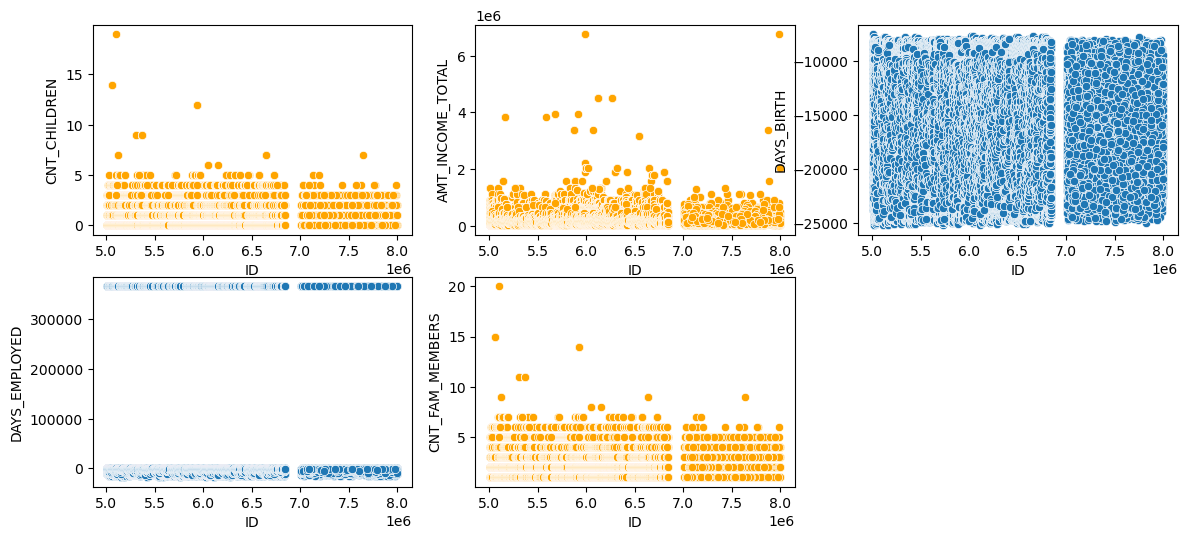

In [95]:
#checking for outliers in data 

fig, ax= plt.subplots(nrows= 2, ncols = 3, figsize= (14,6))

sns.scatterplot(x='ID', y='CNT_CHILDREN', data=application, ax=ax[0][0], color= 'orange')
sns.scatterplot(x='ID', y='AMT_INCOME_TOTAL', data=application, ax=ax[0][1], color='orange')
sns.scatterplot(x='ID', y='DAYS_BIRTH', data=application, ax=ax[0][2])
sns.scatterplot(x='ID', y='DAYS_EMPLOYED', data=application, ax=ax[1][0])
sns.scatterplot(x='ID', y='CNT_FAM_MEMBERS', data=application, ax=ax[1][1], color= 'orange')
fig.delaxes(ax[1][2])

In [96]:
# for CNT_CHILDREN
q_hi = application['CNT_CHILDREN'].quantile(0.999)
q_low = application['CNT_CHILDREN'].quantile(0.001)
application = application[(application['CNT_CHILDREN']>q_low) & (application['CNT_CHILDREN']<q_hi)]

In [97]:
# for AMT_INCOME_TOTAL
q_hi = application['AMT_INCOME_TOTAL'].quantile(0.999)
q_low = application['AMT_INCOME_TOTAL'].quantile(0.001)
application = application[(application['AMT_INCOME_TOTAL']>q_low) & (application['AMT_INCOME_TOTAL']<q_hi)]

In [98]:
# for CNT_FAM_MEMBERS
q_hi = application['CNT_FAM_MEMBERS'].quantile(0.999)
q_low = application['CNT_FAM_MEMBERS'].quantile(0.001)
application = application[(application['CNT_FAM_MEMBERS']>q_low) & (application['CNT_FAM_MEMBERS']<q_hi)]

After handling these outliers values, we will again plot those same graphs

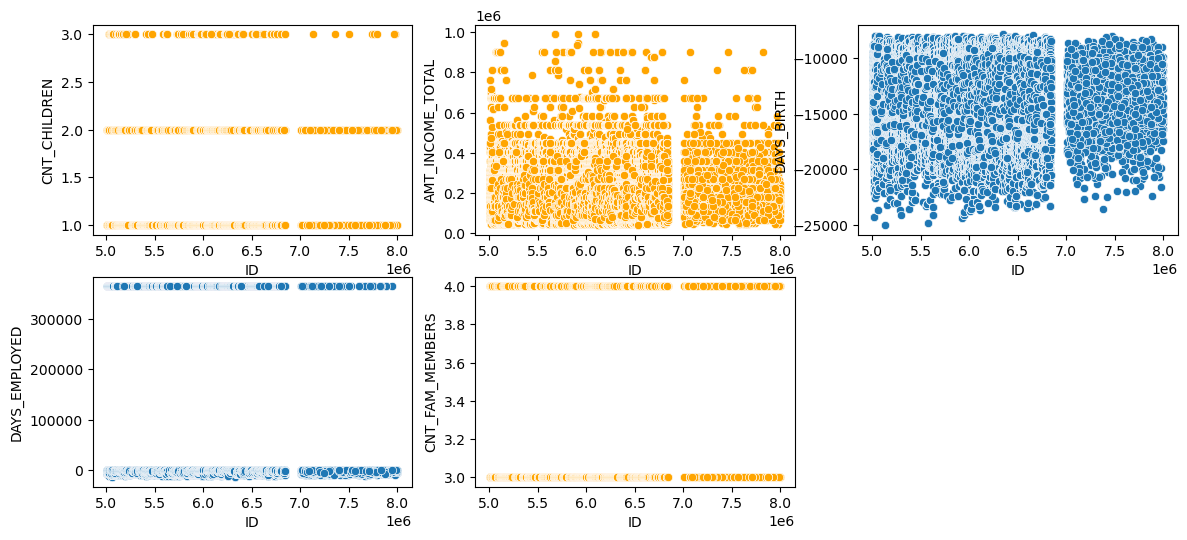

In [99]:
#after handling outliers in data

fig, ax= plt.subplots(nrows= 2, ncols = 3, figsize= (14,6))

sns.scatterplot(x='ID', y='CNT_CHILDREN', data=application, ax=ax[0][0], color= 'orange')
sns.scatterplot(x='ID', y='AMT_INCOME_TOTAL', data=application, ax=ax[0][1], color='orange')
sns.scatterplot(x='ID', y='DAYS_BIRTH', data=application, ax=ax[0][2])
sns.scatterplot(x='ID', y='DAYS_EMPLOYED', data=application, ax=ax[1][0])
sns.scatterplot(x='ID', y='CNT_FAM_MEMBERS', data=application, ax=ax[1][1], color= 'orange')
fig.delaxes(ax[1][2])

as we can see, now the data is more symmetrically distrubuted for better model training 

In [ ]:
#PRE-PROCESSING CREDIT.CSV NOW

In [104]:
credit_df = pd.read_csv("credit_record.csv")
credit_df

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [107]:
credit_df["STATUS"].value_counts()

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

Any bank will not give credit card to a customer with bad credit history. so we will handle those values
let 0 be no debt at all (including debt repayment this month (C) and no credit history (X))
let 1 be the presence of any debt at all

In [108]:
credit_df['STATUS'].replace({'C': -1, 'X' : -1}, inplace=True)
credit_df['STATUS'] = credit_df['STATUS'].astype('int')
credit_df['STATUS'] = credit_df['STATUS'].apply(lambda x:1 if x > 0 else 0)

In [109]:
credit_df['STATUS'].value_counts(normalize = True)

0    0.986464
1    0.013536
Name: STATUS, dtype: float64

only 1% of people have no paid off their debt. This means that our sample cannot be used a representative sample 
as it shows a very specific situation where most people have already cleared their debts.
this will cause the machine model to be biased

In [110]:
credit_df_grouped = credit_df.groupby('ID').agg(max).reset_index()
credit_df_grouped

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,0
1,5001712,0,0
2,5001713,0,0
3,5001714,0,0
4,5001715,0,0
...,...,...,...
45980,5150482,-11,0
45981,5150483,0,0
45982,5150484,0,0
45983,5150485,0,0


In [111]:
full_data = application.join(credit_df_grouped.set_index('ID'), on='ID', how='inner')
full_data.drop(['MONTHS_BALANCE'], axis=1, inplace=True)
full_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,STATUS
29,5008838,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,3.0,0
30,5008839,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,3.0,0
31,5008840,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,3.0,0
32,5008841,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,3.0,0
33,5008842,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,3.0,0


In [112]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9516 entries, 29 to 434805
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   9516 non-null   int64  
 1   CODE_GENDER          9516 non-null   int64  
 2   FLAG_OWN_CAR         9516 non-null   int64  
 3   FLAG_OWN_REALTY      9516 non-null   int64  
 4   CNT_CHILDREN         9516 non-null   int64  
 5   AMT_INCOME_TOTAL     9516 non-null   float64
 6   NAME_INCOME_TYPE     9516 non-null   int64  
 7   NAME_EDUCATION_TYPE  9516 non-null   int64  
 8   NAME_FAMILY_STATUS   9516 non-null   int64  
 9   NAME_HOUSING_TYPE    9516 non-null   int64  
 10  DAYS_BIRTH           9516 non-null   int64  
 11  DAYS_EMPLOYED        9516 non-null   int64  
 12  CNT_FAM_MEMBERS      9516 non-null   float64
 13  STATUS               9516 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 1.1 MB


Now we have 9516 values to train out machine model on 

In [113]:
full_data['STATUS'].value_counts(normalize=True)

0    0.879676
1    0.120324
Name: STATUS, dtype: float64

Our data sample is still not representative as there is not enought sample points for training the model

To equate the sample points in both genres, we will have to either 
reduce no. of people with debt
or
increase the no of people in debt 

Since we can lose a huge amount of data when reducing people without debt, and reduce the accuracy of the machine, 
we will choose the second option.

We will generate more points in people with debt using SMOTE (Synthetic Minority Over-sampling Technique)

In [114]:
X = full_data.iloc[:,1:-1] 
y = full_data.iloc[:,-1]
y

29        0
30        0
31        0
32        0
33        0
         ..
434779    1
434780    1
434782    1
434791    1
434805    1
Name: STATUS, Length: 9516, dtype: int64

In [115]:
#Spliting the data in training to testing at 80:20 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [117]:
!pip install imblearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 3.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 4.2 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [118]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_balanced, y_balanced = oversample.fit_resample(X_train, y_train)
X_test_balanced, y_test_balanced = oversample.fit_resample(X_test, y_test)

In [119]:
a = y_test.value_counts()
b = y_test_balanced.value_counts()
print(a, "\n\n", b)

0    1680
1     224
Name: STATUS, dtype: int64 

 0    1680
1    1680
Name: STATUS, dtype: int64


as we can see, y_test data now contains balanced amount of testing dataset

MODEL SELECTION, TRAINING, EVALUATION

In [135]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import itertools

In [136]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [123]:
model = DecisionTreeClassifier(max_depth=16,
                               min_samples_split=8,
                               random_state=1024)

In [124]:
model.fit(X_balanced, y_balanced)

DecisionTreeClassifier(max_depth=16, min_samples_split=8, random_state=1024)

In [132]:
y_predict = model.predict(X_test_balanced)

In [133]:
class_names = ['0','1']
print('Accuracy Score is {:.7}'.format(accuracy_score(y_test_balanced, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test_balanced,y_predict)))


Accuracy Score is 0.8315476
      0     1
0  1518   162
1   404  1276


Normalized confusion matrix
[[0.90357143 0.09642857]
 [0.24047619 0.75952381]]


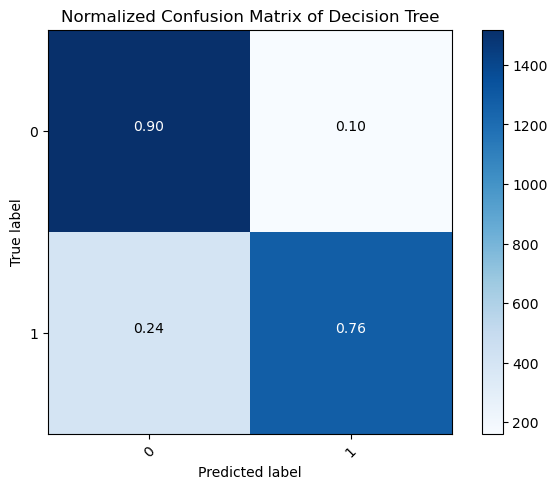

In [137]:
plot_confusion_matrix(confusion_matrix(y_test_balanced,y_predict),
                      classes=class_names, normalize = True, 
                      title='Normalized Confusion Matrix of Decision Tree')

Accuracy Score is 0.8357143
      0     1
0  1528   152
1   400  1280
Normalized confusion matrix
[[0.90952381 0.09047619]
 [0.23809524 0.76190476]]


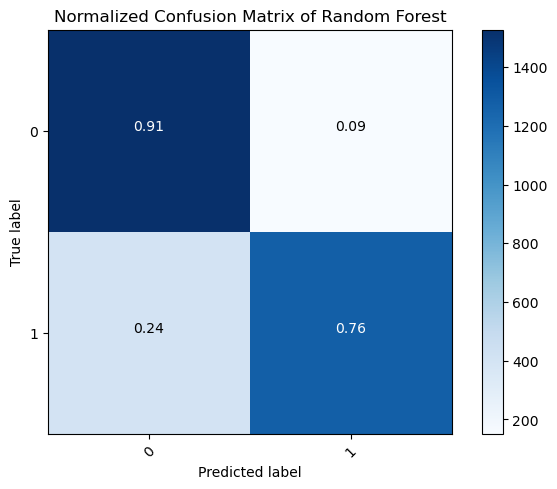

In [143]:
#Fine tuning of model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=250,
                              max_depth=16,
                              min_samples_leaf=12
                              )

model.fit(X_balanced, y_balanced)
y_predict = model.predict(X_test_balanced)
class_names = ['0','1']
print('Accuracy Score is {:.7}'.format(accuracy_score(y_test_balanced, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test_balanced,y_predict)))

plot_confusion_matrix(confusion_matrix(y_test_balanced,y_predict),
                      classes=class_names, normalize = True, 
                      title='Normalized Confusion Matrix of Random Forest')

Accuracy Score is 0.5172619
      0    1
0  1166  514
1  1108  572
Normalized confusion matrix
[[0.69404762 0.30595238]
 [0.65952381 0.34047619]]


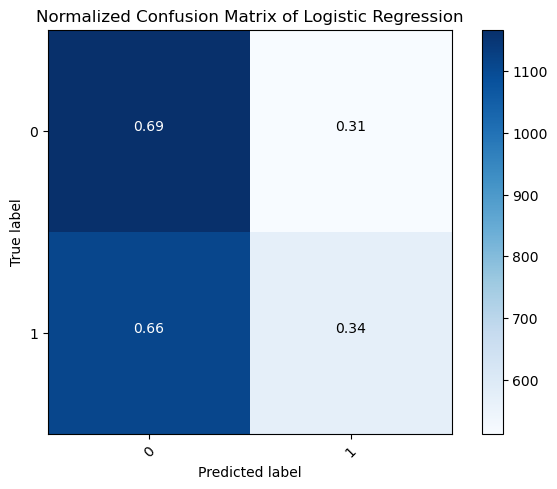

In [144]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=0.8,
                           random_state=0,
                           solver='lbfgs')

model.fit(X_balanced, y_balanced)
y_predict = model.predict(X_test_balanced)
class_names = ['0','1']
print('Accuracy Score is {:.7}'.format(accuracy_score(y_test_balanced, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test_balanced,y_predict)))

plot_confusion_matrix(confusion_matrix(y_test_balanced,y_predict),
                      classes=class_names, normalize = True, 
                      title='Normalized Confusion Matrix of Logistic Regression')

In [145]:
prediction=model.predict(X_test)
print(prediction)

[0 1 0 ... 1 0 1]


In [146]:
accuracy = accuracy_score(y_test, prediction)
print(accuracy)

0.6512605042016807
